In [1]:


# Set the environment variable for CUDA (in case it is necessary)
# os.environ['CUDA_VISIBLE_DEVICES'] = '1'

from modules.shared.globals import *
from modules.training.cme_modeling import ModelBuilder
from modules.training.ts_modeling import (
    build_dataset,
    stratified_split,
    set_seed)

mb = ModelBuilder()

C:\Users\the_3\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\the_3\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If 

In [2]:
seed = SEEDS[0]
inputs_to_use = INPUTS_TO_USE[0]
add_slope = ADD_SLOPE[0]
cme_speed_threshold = CME_SPEED_THRESHOLD[0]
outputs_to_use = OUTPUTS_TO_USE

set_seed(seed)

# set the root directory
root_dir = 'C:/Users/the_3/Documents/github/keras-functional-api/data/electron_cme_data_split_v7'
# build the dataset
X_train, y_train = build_dataset(
    root_dir + '/training',
    inputs_to_use=inputs_to_use,
    add_slope=add_slope,
    outputs_to_use=outputs_to_use,
    cme_speed_threshold=cme_speed_threshold,
    shuffle_data=True)

X_test, y_test = build_dataset(
    root_dir + '/testing',
    inputs_to_use=inputs_to_use,
    add_slope=add_slope,
    outputs_to_use=outputs_to_use,
    cme_speed_threshold=cme_speed_threshold)

X_subtrain, y_subtrain, X_val, y_val = stratified_split(
    X_train,
    y_train,
    shuffle=True,
    seed=seed,
    split=VAL_SPLIT,
    debug=False)

# print all cme_files shapes
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_subtrain.shape: {X_subtrain.shape}')
print(f'y_subtrain.shape: {y_subtrain.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')
print(f'X_val.shape: {X_val.shape}')
print(f'y_val.shape: {y_val.shape}')



X_train.shape: (18114, 124)
y_train.shape: (18114, 1)
X_subtrain.shape: (13584, 124)
y_subtrain.shape: (13584, 1)
X_test.shape: (10445, 124)
y_test.shape: (10445, 1)
X_val.shape: (4530, 124)
y_val.shape: (4530, 1)


In [14]:
from scipy.spatial.distance import jensenshannon
import numpy as np
from typing import Dict, Union


def calculate_js_divergence(X1: np.ndarray, X2: np.ndarray) -> Dict[str, float]:
    """
    Calculate the Jensen-Shannon (JS) divergence for each feature between two datasets.

    Args:
        X1 (np.ndarray): The first dataset (e.g., training data) with shape (n_samples, n_features).
        X2 (np.ndarray): The second dataset (e.g., test data) with shape (n_samples, n_features).

    Returns:
        Dict[str, float]: A dictionary where the keys are feature names (or indices) 
                          and the values are the corresponding JS divergence values.
    """
    js_divergences = {}
    n_features = X1.shape[1]  # Number of features

    # Iterate over each feature index
    for i in range(n_features):
        # Create a histogram for the feature in each dataset
        p = np.histogram(X1[:, i], bins=100, density=True)[0]
        q = np.histogram(X2[:, i], bins=100, density=True)[0]

        # Calculate the JS divergence between the two histograms
        js_div = jensenshannon(p, q)

        # Store the JS divergence in the dictionary with the feature index as the key
        js_divergences[f'Feature_{i}'] = js_div

    return js_divergences


import matplotlib.pyplot as plt


def calculate_js_divergence_labels(y1: Union[np.ndarray, list], y2: Union[np.ndarray, list], bin_width: float = 0.1,
                                   plot: bool = False) -> float:
    """
    Calculate the Jensen-Shannon (JS) divergence between the label distributions of two regression datasets.
    Optionally, plot the histograms of the label distributions.

    Args:
        y1 (Union[np.ndarray, list]): The labels for the first dataset (e.g., training labels).
        y2 (Union[np.ndarray, list]): The labels for the second dataset (e.g., test labels).
        plot (bool): If True, plot the histograms of the label distributions. Default is False.

    Returns:
        float: The JS divergence between the label distributions.
    """
    # Define the bin edges for the histograms with width 0.1 between -2.5 and 2.5
    bins = np.arange(-2.5, 2.5 + bin_width, bin_width)

    # Calculate histograms for the labels with the same bins for both datasets
    p = np.histogram(y1, bins=bins, density=True)[0]
    q = np.histogram(y2, bins=bins, density=True)[0]

    # Calculate the JS divergence between the two label distributions
    js_div = jensenshannon(p, q)

    # Plot the histograms if requested
    if plot:
        plt.figure(figsize=(10, 6))

        # Plot the histogram for the first dataset
        plt.hist(y1, bins=bins, density=True, alpha=0.5, color='blue', label='Dataset 1 (y1)')

        # Plot the histogram for the second dataset
        plt.hist(y2, bins=bins, density=True, alpha=0.5, color='orange', label='Dataset 2 (y2)')

        # Adding labels and title
        plt.xlabel('Label Value')
        plt.ylabel('Density')
        plt.title('Label Distribution Comparison')
        plt.legend(loc='upper right')

        # Show the plot
        plt.show()

    return js_div

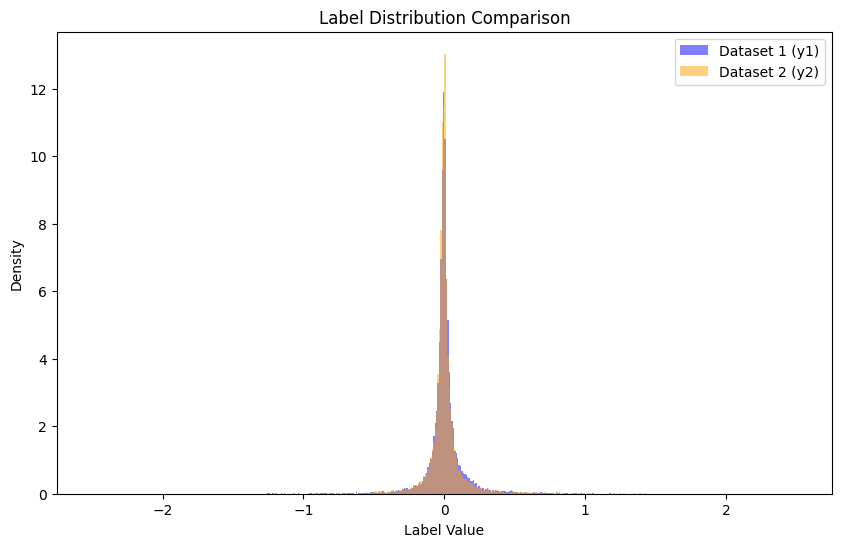

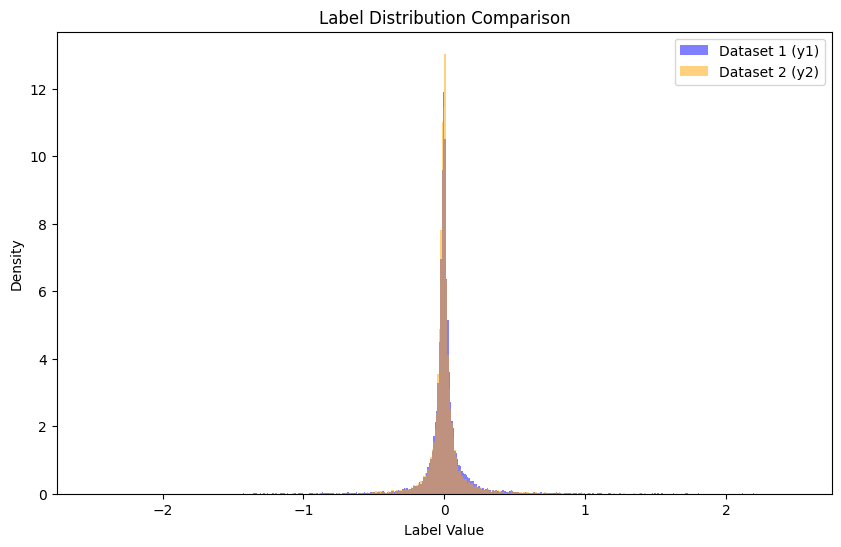

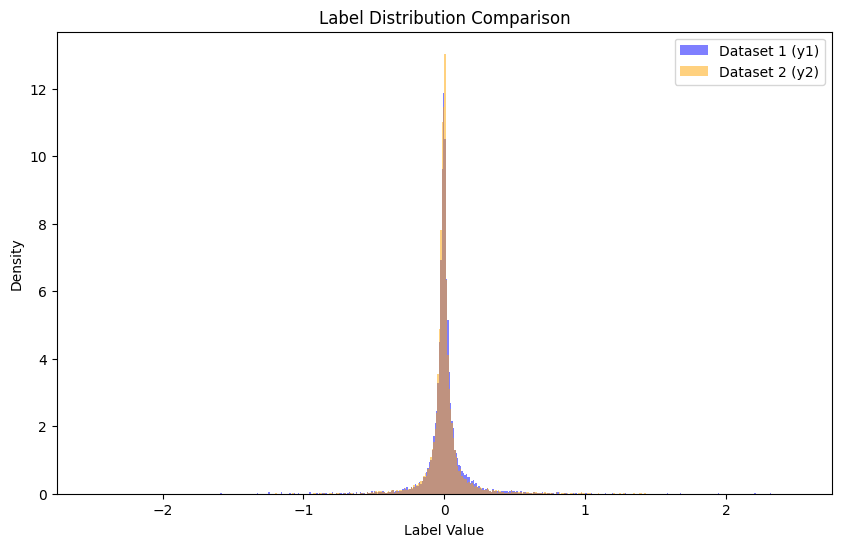

Seed: 456789, Inputs: ['e0.5', 'e4.4', 'p6.1', 'p'], Add Slope: False, CME Speed Threshold: 0
JS Divergence between X_train and X_test:
Feature: Feature_0, JS Divergence: 0.1519
Feature: Feature_1, JS Divergence: 0.1485
Feature: Feature_2, JS Divergence: 0.1506
Feature: Feature_3, JS Divergence: 0.1505
Feature: Feature_4, JS Divergence: 0.1530
Feature: Feature_5, JS Divergence: 0.1530
Feature: Feature_6, JS Divergence: 0.1542
Feature: Feature_7, JS Divergence: 0.1548
Feature: Feature_8, JS Divergence: 0.1542
Feature: Feature_9, JS Divergence: 0.1557
Feature: Feature_10, JS Divergence: 0.1553
Feature: Feature_11, JS Divergence: 0.1544
Feature: Feature_12, JS Divergence: 0.1547
Feature: Feature_13, JS Divergence: 0.1550
Feature: Feature_14, JS Divergence: 0.1585
Feature: Feature_15, JS Divergence: 0.1588
Feature: Feature_16, JS Divergence: 0.1579
Feature: Feature_17, JS Divergence: 0.1570
Feature: Feature_18, JS Divergence: 0.1588
Feature: Feature_19, JS Divergence: 0.1597
Feature: Featu

In [15]:
# Calculate JS divergence for features
js_train_test = calculate_js_divergence(X_train, X_test)
js_subtrain_test = calculate_js_divergence(X_subtrain, X_test)
js_val_test = calculate_js_divergence(X_val, X_test)

# Calculate JS divergence for labels
js_labels_train_test = calculate_js_divergence_labels(y_train, y_test, bin_width=0.01, plot=True)
js_labels_subtrain_test = calculate_js_divergence_labels(y_subtrain, y_test, bin_width=0.01, plot=True)
js_labels_val_test = calculate_js_divergence_labels(y_val, y_test, bin_width=0.01, plot=True)

# Print all JS divergences for features
print(f'Seed: {seed}, Inputs: {inputs_to_use}, Add Slope: {add_slope}, CME Speed Threshold: {cme_speed_threshold}')
print('JS Divergence between X_train and X_test:')
for feature, js_div in js_train_test.items():
    print(f'Feature: {feature}, JS Divergence: {js_div:.4f}')

print('JS Divergence between X_subtrain and X_test:')
for feature, js_div in js_subtrain_test.items():
    print(f'Feature: {feature}, JS Divergence: {js_div:.4f}')

print('JS Divergence between X_val and X_test:')
for feature, js_div in js_val_test.items():
    print(f'Feature: {feature}, JS Divergence: {js_div:.4f}')

# Print average JS divergences for features
avg_js_train_test = np.mean(list(js_train_test.values()))
avg_js_subtrain_test = np.mean(list(js_subtrain_test.values()))
avg_js_val_test = np.mean(list(js_val_test.values()))
print(f'Average JS Divergence between X_train and X_test: {avg_js_train_test:.4f}')
print(f'Average JS Divergence between X_subtrain and X_test: {avg_js_subtrain_test:.4f}')
print(f'Average JS Divergence between X_val and X_test: {avg_js_val_test:.4f}')

# Print JS divergences for labels
print(f'JS Divergence between y_train and y_test: {js_labels_train_test:.4f}')
print(f'JS Divergence between y_subtrain and y_test: {js_labels_subtrain_test:.4f}')
print(f'JS Divergence between y_val and y_test: {js_labels_val_test:.4f}')

### Summary: Jensen-Shannon (JS) Divergence

- **JS Divergence**: Measures the similarity between two probability distributions.
- **Range**: 0 (identical) to 1 (completely dissimilar).
- **Good Value**: JS close to 0 indicates similar distributions.
- **Bad Value**: JS close to 1 indicates significant differences.

### Results for Your Dataset

- **y_train vs. y_test**: JS = 0.0861
- **y_subtrain vs. y_test**: JS = 0.0867
- **y_val vs. y_test**: JS = 0.0943

These relatively low JS values suggest that the label distributions in your training, subtraining, validation, and test sets are quite similar. While the divergences are not negligible, they are still well within a range that generally indicates good distributional alignment. This implies that your model should be able to generalize well across these datasets, with minimal risk of performance degradation due to distributional differences.

In [16]:
def calculate_js_divergence_labels_subset(y1: Union[np.ndarray, list], y2: Union[np.ndarray, list],
                                          bin_width: float = 0.1, lower_b: float = -2.5,
                                          higher_b: float = 2.5, plot: bool = False) -> float:
    """
    Calculate the Jensen-Shannon (JS) divergence between the label distributions of two regression datasets
    within a specified subset range. Optionally, plot the histograms of the label distributions.

    Args:
        y1 (Union[np.ndarray, list]): The labels for the first dataset (e.g., training labels).
        y2 (Union[np.ndarray, list]): The labels for the second dataset (e.g., test labels).
        bin_width (float): The width of the bins for the histograms. Default is 0.1.
        lower_b (float): The lower bound of the subset range to consider. Default is -2.5.
        higher_b (float): The upper bound of the subset range to consider. Default is 2.5.
        plot (bool): If True, plot the histograms of the label distributions. Default is False.

    Returns:
        float: The JS divergence between the label distributions within the specified range.
    """
    # Filter the data to consider only the subset within the specified range
    y1_subset = np.array([y for y in y1 if lower_b <= y <= higher_b])
    y2_subset = np.array([y for y in y2 if lower_b <= y <= higher_b])

    # Define the bin edges for the histograms with the specified bin width within the given range
    bins = np.arange(lower_b, higher_b + bin_width, bin_width)

    # Calculate histograms for the labels with the same bins for both datasets
    p = np.histogram(y1_subset, bins=bins, density=True)[0]
    q = np.histogram(y2_subset, bins=bins, density=True)[0]

    # Calculate the JS divergence between the two label distributions
    js_div = jensenshannon(p, q)

    # Plot the histograms if requested
    if plot:
        plt.figure(figsize=(10, 6))

        # Plot the histogram for the first dataset
        plt.hist(y1_subset, bins=bins, density=True, alpha=0.5, color='blue', label='Dataset 1 (y1)')

        # Plot the histogram for the second dataset
        plt.hist(y2_subset, bins=bins, density=True, alpha=0.5, color='orange', label='Dataset 2 (y2)')

        # Adding labels and title
        plt.xlabel('Label Value')
        plt.ylabel('Density')
        plt.title(f'Label Distribution Comparison (Subset between {lower_b} and {higher_b})')
        plt.legend(loc='upper right')

        # Show the plot
        plt.show()

    return js_div

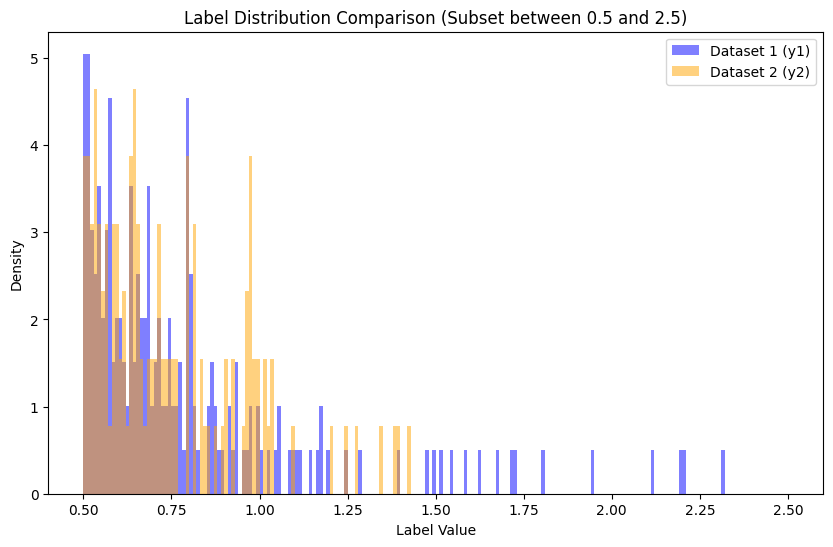

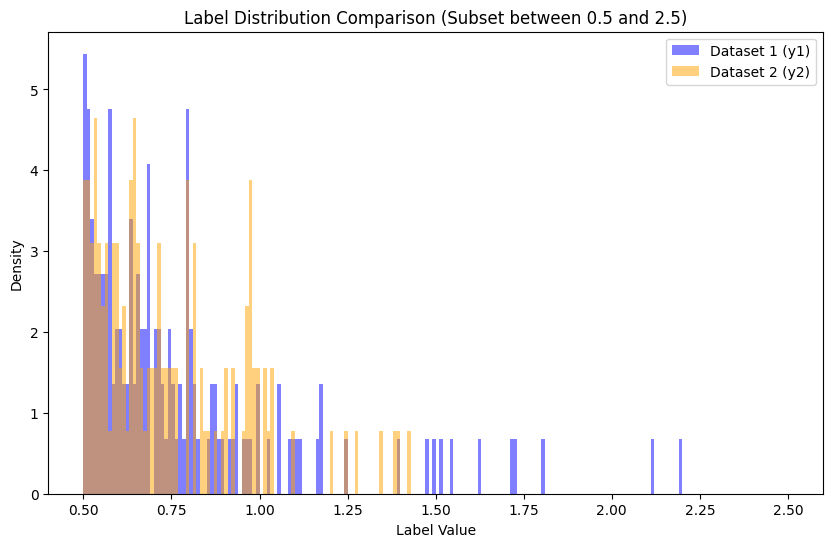

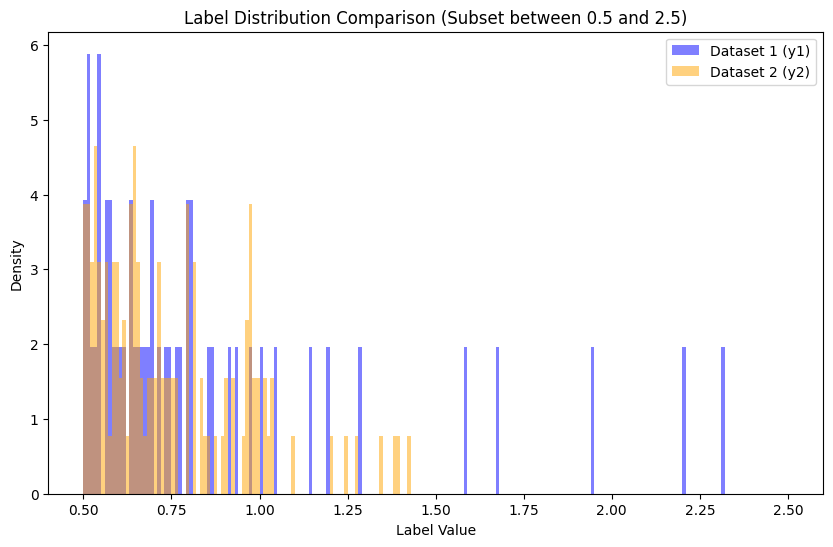

JS Divergence between y_train and y_test (Subset between 0.5 and 2.5): 0.4015
JS Divergence between y_subtrain and y_test (Subset between 0.5 and 2.5): 0.3993
JS Divergence between y_val and y_test (Subset between 0.5 and 2.5): 0.5027


In [20]:
lower_bound = 0.5
upper_bound = 2.5

# Calculate JS divergence for labels within the subset range
js_labels_train_test_subset = calculate_js_divergence_labels_subset(y_train, y_test, lower_b=lower_bound,
                                                                    higher_b=upper_bound, bin_width=0.01, plot=True)
js_labels_subtrain_test_subset = calculate_js_divergence_labels_subset(y_subtrain, y_test, lower_b=lower_bound,
                                                                       higher_b=upper_bound, bin_width=0.01, plot=True)
js_labels_val_test_subset = calculate_js_divergence_labels_subset(y_val, y_test, lower_b=lower_bound,
                                                                  higher_b=upper_bound, bin_width=0.01, plot=True)

# Print JS divergences for labels within the subset range
print(
    f'JS Divergence between y_train and y_test (Subset between {lower_bound} and {upper_bound}): {js_labels_train_test_subset:.4f}')
print(
    f'JS Divergence between y_subtrain and y_test (Subset between {lower_bound} and {upper_bound}): {js_labels_subtrain_test_subset:.4f}')
print(
    f'JS Divergence between y_val and y_test (Subset between {lower_bound} and {upper_bound}): {js_labels_val_test_subset:.4f}')

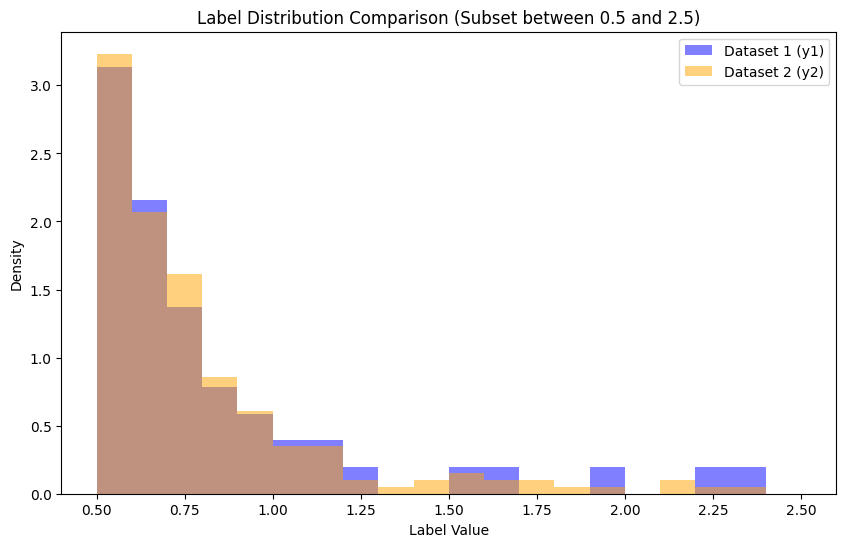

JS Divergence between y_val and y_train (Subset between 0.5 and 2.5): 0.1528


In [25]:
lower_bound = 0.5
upper_bound = 2.5

# Calculate JS divergence for labels within the subset range
# js_labels_train_test_subset = calculate_js_divergence_labels_subset(y_train, y_test, lower_b=lower_bound,
#                                                                     higher_b=upper_bound, bin_width=0.01, plot=True)
# js_labels_subtrain_test_subset = calculate_js_divergence_labels_subset(y_subtrain, y_test, lower_b=lower_bound,
#                                                                        higher_b=upper_bound, bin_width=0.01, plot=True)
js_labels_val_test_subset = calculate_js_divergence_labels_subset(y_val, y_train, lower_b=lower_bound,
                                                                  higher_b=upper_bound, bin_width=0.1, plot=True)


# Print JS divergences for labels within the subset range
# print(
#     f'JS Divergence between y_train and y_test (Subset between {lower_bound} and {upper_bound}): {js_labels_train_test_subset:.4f}')
# print(
#     f'JS Divergence between y_subtrain and y_test (Subset between {lower_bound} and {upper_bound}): {js_labels_subtrain_test_subset:.4f}')
print(
    f'JS Divergence between y_val and y_train (Subset between {lower_bound} and {upper_bound}): {js_labels_val_test_subset:.4f}')

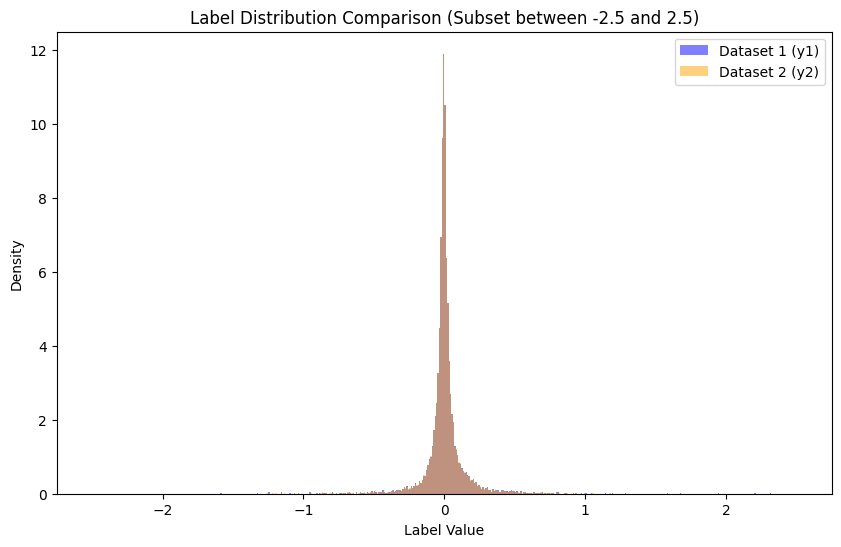

JS Divergence between y_val and y_train (Subset between -2.5 and 2.5): 0.0531


In [24]:
lower_bound = -2.5
upper_bound = 2.5

# Calculate JS divergence for labels within the subset range
# js_labels_train_test_subset = calculate_js_divergence_labels_subset(y_train, y_test, lower_b=lower_bound,
#                                                                     higher_b=upper_bound, bin_width=0.01, plot=True)
# js_labels_subtrain_test_subset = calculate_js_divergence_labels_subset(y_subtrain, y_test, lower_b=lower_bound,
#                                                                        higher_b=upper_bound, bin_width=0.01, plot=True)
js_labels_val_test_subset = calculate_js_divergence_labels_subset(y_val, y_train, lower_b=lower_bound,
                                                                  higher_b=upper_bound, bin_width=0.01, plot=True)


# Print JS divergences for labels within the subset range
# print(
#     f'JS Divergence between y_train and y_test (Subset between {lower_bound} and {upper_bound}): {js_labels_train_test_subset:.4f}')
# print(
#     f'JS Divergence between y_subtrain and y_test (Subset between {lower_bound} and {upper_bound}): {js_labels_subtrain_test_subset:.4f}')
print(
    f'JS Divergence between y_val and y_train (Subset between {lower_bound} and {upper_bound}): {js_labels_val_test_subset:.4f}')

### Analysis of JS Divergence for the Subset between 0.5 and 2.5

- **JS Divergence between `y_train` and `y_test` (Subset 0.5 to 2.5): 0.4015**
- **JS Divergence between `y_subtrain` and `y_test` (Subset 0.5 to 2.5): 0.3993**
- **JS Divergence between `y_val` and `y_test` (Subset 0.5 to 2.5): 0.5027**

### Interpretation:

- **Higher JS Divergence**:
  - These JS divergence values are notably higher than those observed for the full dataset range. Specifically, the divergence values range from approximately 0.4 to 0.5.
  - **0.4015** and **0.3993** indicate a moderate difference between the training, subtraining, and test label distributions.
  - **0.5027** is quite high, particularly for the validation set compared to the test set, suggesting a more significant difference in this subset range.

### Implications:

- **Potential Distributional Shift**: The higher JS divergence in this specific range (0.5 to 2.5) suggests that there is a notable difference in how the labels are distributed in this region between your training, subtraining, validation, and test sets. This could indicate a distributional shift, particularly in the validation set, that may affect model performance in this range.
- **Impact on Model Performance**:
  - If this range (0.5 to 2.5) is particularly important for your prediction task, the model might struggle to generalize well in this interval due to the distributional differences.
  - The validation set having the highest divergence (**0.5027**) compared to the test set could lead to validation performance not accurately reflecting the test performance.

#

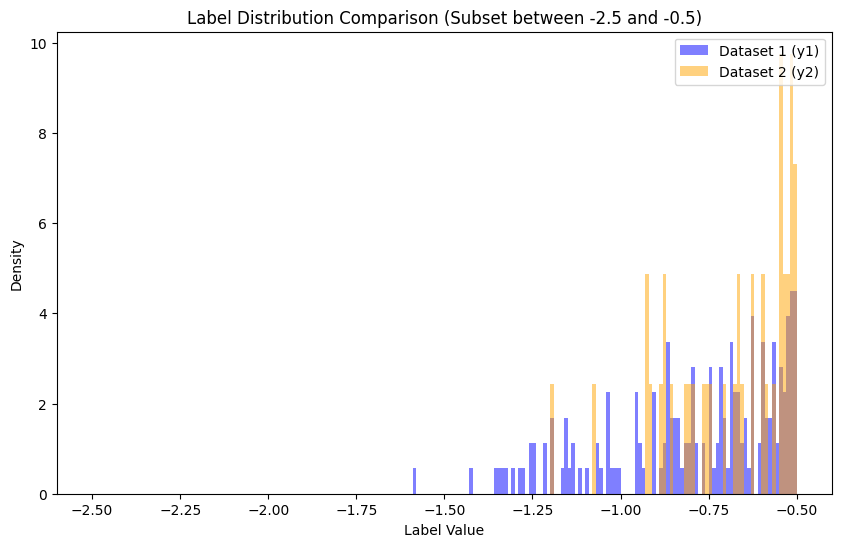

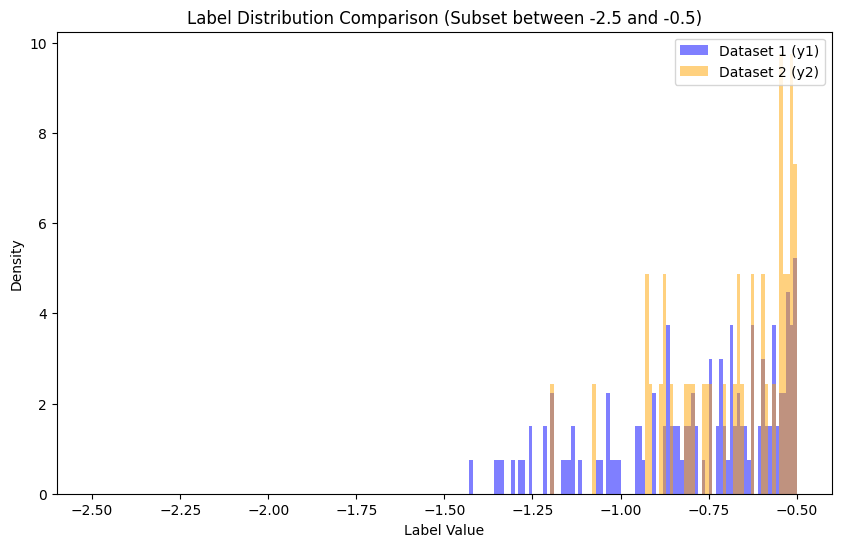

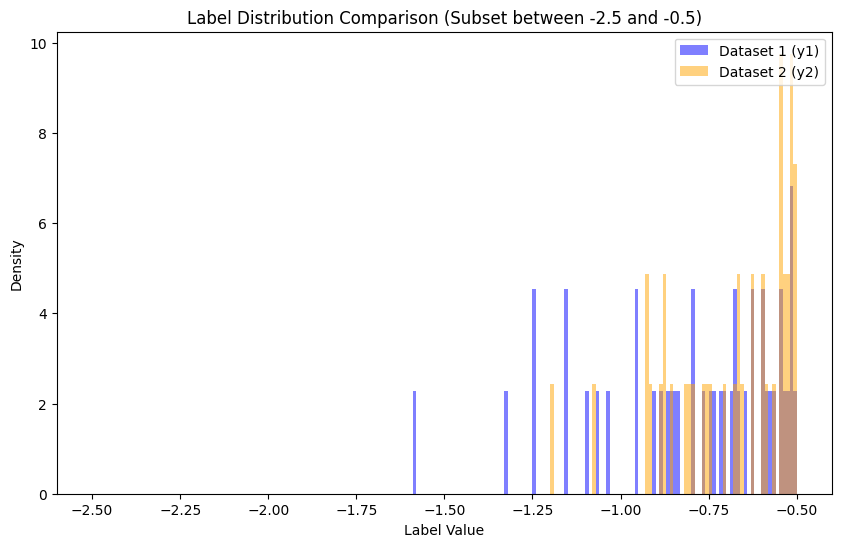

JS Divergence between y_train and y_test (Subset between -2.5 and -0.5): 0.4991
JS Divergence between y_subtrain and y_test (Subset between -2.5 and -0.5): 0.5104
JS Divergence between y_val and y_test (Subset between -2.5 and -0.5): 0.5238


In [21]:
lower_bound = -2.5
higher_bound = -0.5

# Calculate JS divergence for labels within the subset range
js_labels_train_test_subset = calculate_js_divergence_labels_subset(y_train, y_test, lower_b=lower_bound,
                                                                    higher_b=higher_bound, bin_width=0.01, plot=True)
js_labels_subtrain_test_subset = calculate_js_divergence_labels_subset(y_subtrain, y_test, lower_b=lower_bound,
                                                                       higher_b=higher_bound, bin_width=0.01, plot=True)
js_labels_val_test_subset = calculate_js_divergence_labels_subset(y_val, y_test, lower_b=lower_bound,
                                                                    higher_b=higher_bound, bin_width=0.01, plot=True)

# Print JS divergences for labels within the subset range
print(
    f'JS Divergence between y_train and y_test (Subset between {lower_bound} and {higher_bound}): {js_labels_train_test_subset:.4f}')
print(
    f'JS Divergence between y_subtrain and y_test (Subset between {lower_bound} and {higher_bound}): {js_labels_subtrain_test_subset:.4f}')
print(
    f'JS Divergence between y_val and y_test (Subset between {lower_bound} and {higher_bound}): {js_labels_val_test_subset:.4f}')



### Analysis of JS Divergence for the Subset between -2.5 and -0.5

- **JS Divergence between `y_train` and `y_test` (Subset -2.5 to -0.5): 0.4991**
- **JS Divergence between `y_subtrain` and `y_test` (Subset -2.5 to -0.5): 0.5104**
- **JS Divergence between `y_val` and `y_test` (Subset -2.5 to -0.5): 0.5238**

### Interpretation:

- **High JS Divergence**:
  - These JS divergence values are quite high, close to or exceeding 0.5, which indicates significant differences in the label distributions between your datasets in the subset range from -2.5 to -0.5.
  - **0.4991** for `y_train` vs. `y_test` and **0.5104** for `y_subtrain` vs. `y_test` suggest that the training and subtraining sets differ notably from the test set in this range.
  - **0.5238** for `y_val` vs. `y_test` is the highest, indicating that the validation set is particularly different from the test set in this range.

### Implications:

- **Significant Distributional Shift**: The JS divergence values above 0.5 suggest that there is a substantial shift in label distributions between your datasets in the interval from -2.5 to -0.5. This is a strong indicator that the model trained on these data might not generalize well to the test set, especially in this specific range.
- **Model Performance Concerns**:
  - The model's performance in the range from -2.5 to -0.5 could be severely affected due to these high divergence values. Predictions in this region might be less accurate, as the training and validation sets do not represent the test set well in this interval.
  - The highest divergence in the validation set (**0.5238**) suggests that validation performance may not be a reliable indicator of test performance in this range, potentially leading to over- or under-estimation of the model's capability.